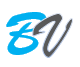

In [1]:
#Not to be distributed without granted permission
from IPython.display import display, Image
display(Image(filename='logo.png'))

# Automated Alert Script

## Business Use Case

The Objective of this exercise is to create automatic email alerts to provide key insights from data in a SQL database (Microsoft SQL Server).  By creating this script, we can set criteria to look for red flags, positive insights, and more, reducing overhead and creating set standards for KPIs.  We will look at the following variables: A,B,C.  Lastly, we'll provide next steps to take this analysis further.

## Imports

In [5]:
import pandas as pd
import datetime
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email import encoders
import datetime
import p #My custom module for login details

In [6]:
#Let's get the date to keep clean records of the files and emails for recollection and audit purposes
datez = datetime.datetime.now().strftime('%Y-%m-%d')

In [ ]:
#SQL connection and query; change UID=UID and PWD=PWD to the actual userID and password respectively
cnxn=pyodbc.connect('DRIVER={SQL Server};SERVER=SERVER;PORT:1433;DATABASE=DATABASE;UID=UID;PWD=PWD;Trusted_connection=yes')
cursor = cnxn.cursor()
#Instead of SQL SCRIPT, put your actual SQL Script
cursor.execute("""
    SQL SCRIPT
    """)

row=cursor.fetchall()

#Write SQL to CSV
with open('file'+datez+'.csv', 'w', newline='') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(['header 1','header2'])
    writer.writerows(row)

for row in cursor.fetchall():
    print(row)

In [15]:
#Set up crap for the attachments
files = "C:/Users/B/Desktop/pythonScripts"
filenames = ['file'+datez+'.csv']

message = 'Test email: '+datetime.datetime.now().strftime('%Y-%m-%d')

#Set up users for email
gmail_user = p.emailUser() #Set this to be the email sender/cron job; e.g. 'sender@gmail.com'
gmail_pwd = p.emailPass() #Set this be the sender/cron job's password; e.g. 'password123'
recipients = [p.emailRecipient1(),p.emailRecipient2()] #Set this to be the email recipient; e.g. ['recipient1@gmail.com','recipient2@gmail.com']

#Create Module
def mail(to, subject, text, attach):
    msg = MIMEMultipart()
    msg['From'] = gmail_user
    msg['To'] = ", ".join(recipients)
    msg['Subject'] = subject

    msg.attach(MIMEText(text))

    #get all the attachments
    for file in filenames:
      part = MIMEBase('application', 'octet-stream')
      part.set_payload(open(file, 'rb').read())
      encoders.encode_base64(part)
      part.add_header('Content-Disposition', 'attachment; filename="%s"' % file)
      msg.attach(part)

    mailServer = smtplib.SMTP("smtp.gmail.com", 587)
    #mailServer.ehlo()
    mailServer.starttls()
    #mailServer.ehlo()
    mailServer.login(gmail_user, gmail_pwd)
    try:
        mailServer.sendmail(gmail_user, to, msg.as_string())
        #mailServer.close()
        mailServer.quit()
        print('Sent to', gmail_user, 'and', recipients)
    except:
        print('Failed to send to', gmail_user, 'and', recipients)
        
#send it
mail(recipients,
   'Testing this out',
   message,
   filenames)

Sent to stucchireplay@gmail.com and ['stucchireplay@gmail.com', 'stucchireplay@gmail.com']
